## (A.1) Determine Eigenvector Centrality for each node in the graph.

This is equivalent to solving $\lambda e = Ae$ where $A$ is the adjacency matrix. Since we have the calculations done for us, we merely can find the dominant (largest) eigenvector's index and look it up in the corresponding $E$ matrix, which contains column-wise eigenvector centralities for node $i$. Here I verify using NetworkX, which I also use to visualize the graph.

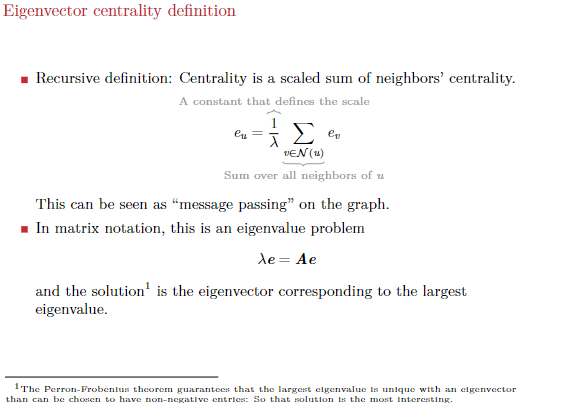

Lambda: [ 3.646  2.    -1.646 -1.    -1.    -1.    -1.   ]

E:
[[-0.339 -0.408  0.228 -0.816 -0.168 -0.071  0.079]
 [-0.339  0.408  0.228  0.     0.731  0.103 -0.327]
 [-0.339 -0.408  0.228  0.408 -0.195  0.667  0.126]
 [-0.339 -0.408  0.228  0.408  0.363 -0.595 -0.205]
 [-0.339  0.408  0.228 -0.    -0.366  0.249 -0.459]
 [-0.558  0.    -0.83   0.    -0.     0.     0.   ]
 [-0.339  0.408  0.228 -0.    -0.366 -0.351  0.786]]

Eigenvector Centrality:
[0.339, 0.339, 0.339, 0.339, 0.339, 0.558, 0.339]
NetworkX Result:
[0.339, 0.339, 0.339, 0.339, 0.339, 0.558, 0.339]


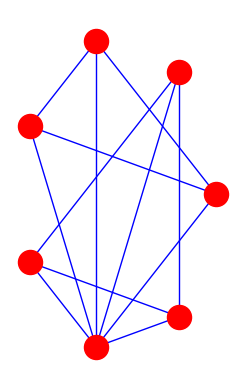

In [69]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


A = np.array([[0., 0., 1., 1., 0., 1., 0.],
              [0., 0., 0., 0., 1., 1., 1.],
              [1., 0., 0., 1., 0., 1., 0.],
              [1., 0., 1., 0., 0., 1., 0.],
              [0., 1., 0., 0., 0., 1., 1.],
              [1., 1., 1., 1., 1., 0., 1.],
              [0., 1., 0., 0., 1., 1., 0.]])

G = nx.from_numpy_matrix(A)
subax1 = plt.subplot(121)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

# Eigendecomposition
lambda_, E = np.linalg.eig(A)
print(f"Lambda: {np.round(lambda_, 3)}\n")
print(f"E:\n{np.round(E, 3)}\n {60*'='}\n")

# Identify dominant eigenvalue and its corresponding ECV (may need to be multiplied by -1, as both -v and v are valid answers for same eigenvalues.)
# But by Perron-Frobenius we know this value must have strictly positive entries.
index = lambda_.argmax()
eigenCentralityValues = [np.round(E[ecv, index], 3)*-1 for ecv in range(len(A))]

# Print the result
print(f"Eigenvector Centrality:\n{eigenCentralityValues}")
print(f"NetworkX Result:\n{[np.round(v[1], 3) for v in nx.eigenvector_centrality_numpy(G, weight=None, max_iter=50, tol=0).items()]}")

## (A.2) Determine the clustering coefficient for each node in the graph.

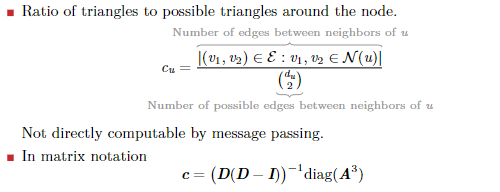

In [70]:
# Degree matrix (How many neighbours does each node have? Summing rows of the adjacency matrix, A)
D = np.diag([np.sum(row) for row in A])
c = (  np.linalg.inv( D@(D-np.identity(len(A))) ) @ np.diag(np.linalg.matrix_power(A, 3)) )
print(f"Clustering Coefficient:\n{c}")
print(f"NetworkX Result:\n{[np.round(v[1], 3) for v in nx.clustering(G).items()]}")

Clustering Coefficient:
[1.  1.  1.  1.  1.  0.4 1. ]
NetworkX Result:
[1.0, 1.0, 1.0, 1.0, 1.0, 0.4, 1.0]


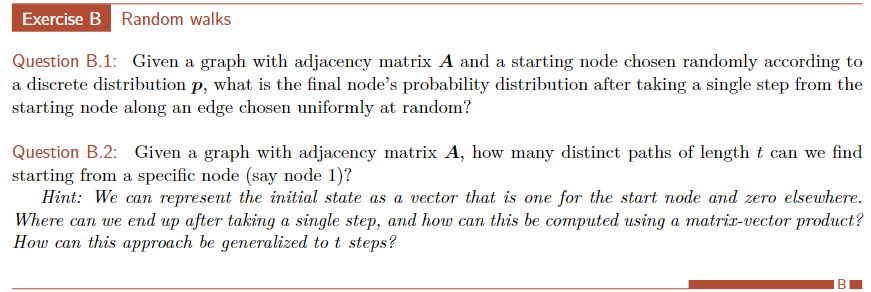

### **B.1**

The starting node is chosen randomly with probability $p$, and the transition probability to it's neighbouring nodes are uniform, hence for a given neighbouring node $j$ and starting node $u$ the transition probability:

$$T_{uj} = \frac{A_{uj}}{\underbrace{\sum_{k\in\mathcal{N(u)}}}_{\text{u's neighbours}} A_{uk}}$$
$$q = p\cdot T$$

### **B.2**

Say we represent the starting node in a vector $v_1$ for node 1, as exemplified in the text. Multiplying the initial state by the adjacency matrix $A$ iteratively by $t$ gives the sum of all paths to node $i$ of length $t$. This is much the same concept of exponentiating the entirety of $A$ as seen in the clustering coefficient with triangle calculations, e.g. *"How many times do I end up where I started if I walk 3 steps" $\Leftrightarrow \texttt{np.diag}(A^3)$*


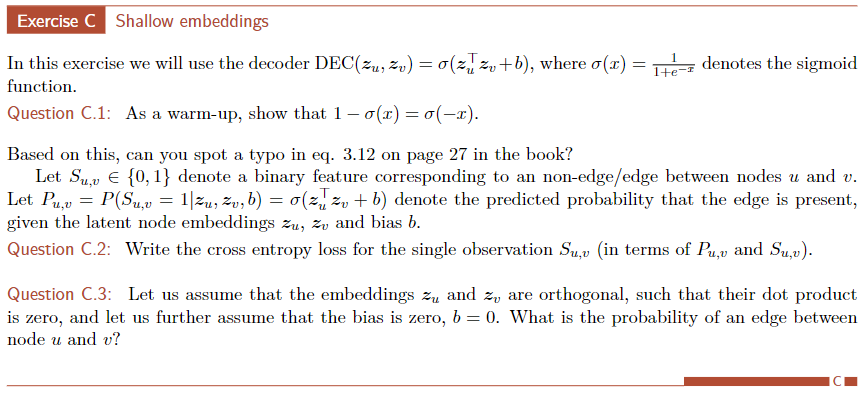

### **C.1**

$$ 1-\sigma(x)=1-\frac{1}{1+e^{-x}} = \underbrace{\frac{1+e^{-x}}{1+e^{-x}}}_{=1}-\frac{1}{1+e^{-x}} = \frac{1+e^{-x}-1}{1+e^{-x}} = \frac{e^{-x}}{1+e^{-x}} = \underbrace{\frac{e^{-x}e^{x}}{(1+e^{-x})e^{x}}}_{\text{multiply}~e^x} = \frac{1}{1+e^{x}} = \sigma(-x)$$

### **C.2**




### **C.3**

Using logistic regression, and hence the sigmoid function $\sigma(x)$, and given the embeddings for nodes $u$ and $v$ are orthogonal in addition to the bias $b=0$, ie. the log-odds is $x=z_u^T z_v+b=0+0=0$, then the probability of an edge is given by:

$$P(\mathcal{E}(u,v))=\sigma(\texttt{DEC}(z_u, z_v))=\sigma(x)=\frac{1}{1+e^0}=\frac{1}{1+1}=\frac{1}{2}$$

## **D.2**

- The node embeddings are simply a look-up table of connecting an index in the graph (node) to a specific embedded vector in the embedded space. It's equivalent to a $\texttt{nn.Linear}$ with some modifications. It's a bit faster than the other computation, as it doesn't do matrix-vector calculations, but merely is a look-up. Check the documentation.

- The $\texttt{forward}$ function computes the probability of two nodes being linked in the graph (which is a table here). This is done for the two variable indices $\texttt{rx}$ and $\texttt{tx}$, respectively.

## **D.3**

Embed dim: 2 | Loss = 0.424: 100%|██████████| 600/600 [00:01<00:00, 475.49it/s]
Embed dim: 4 | Loss = 0.254: 100%|██████████| 600/600 [00:01<00:00, 472.06it/s]
Embed dim: 8 | Loss = 0.116: 100%|██████████| 600/600 [00:01<00:00, 456.16it/s]
Embed dim: 16 | Loss = 0.076: 100%|██████████| 600/600 [00:01<00:00, 420.02it/s]
Embed dim: 32 | Loss = 0.031: 100%|██████████| 600/600 [00:01<00:00, 350.19it/s]
Embed dim: 64 | Loss = 0.024: 100%|██████████| 600/600 [00:02<00:00, 257.54it/s]
Embed dim: 128 | Loss = 1.153: 100%|██████████| 600/600 [00:03<00:00, 163.83it/s]
Embed dim: 256 | Loss = 5.668: 100%|██████████| 600/600 [00:06<00:00, 90.66it/s]


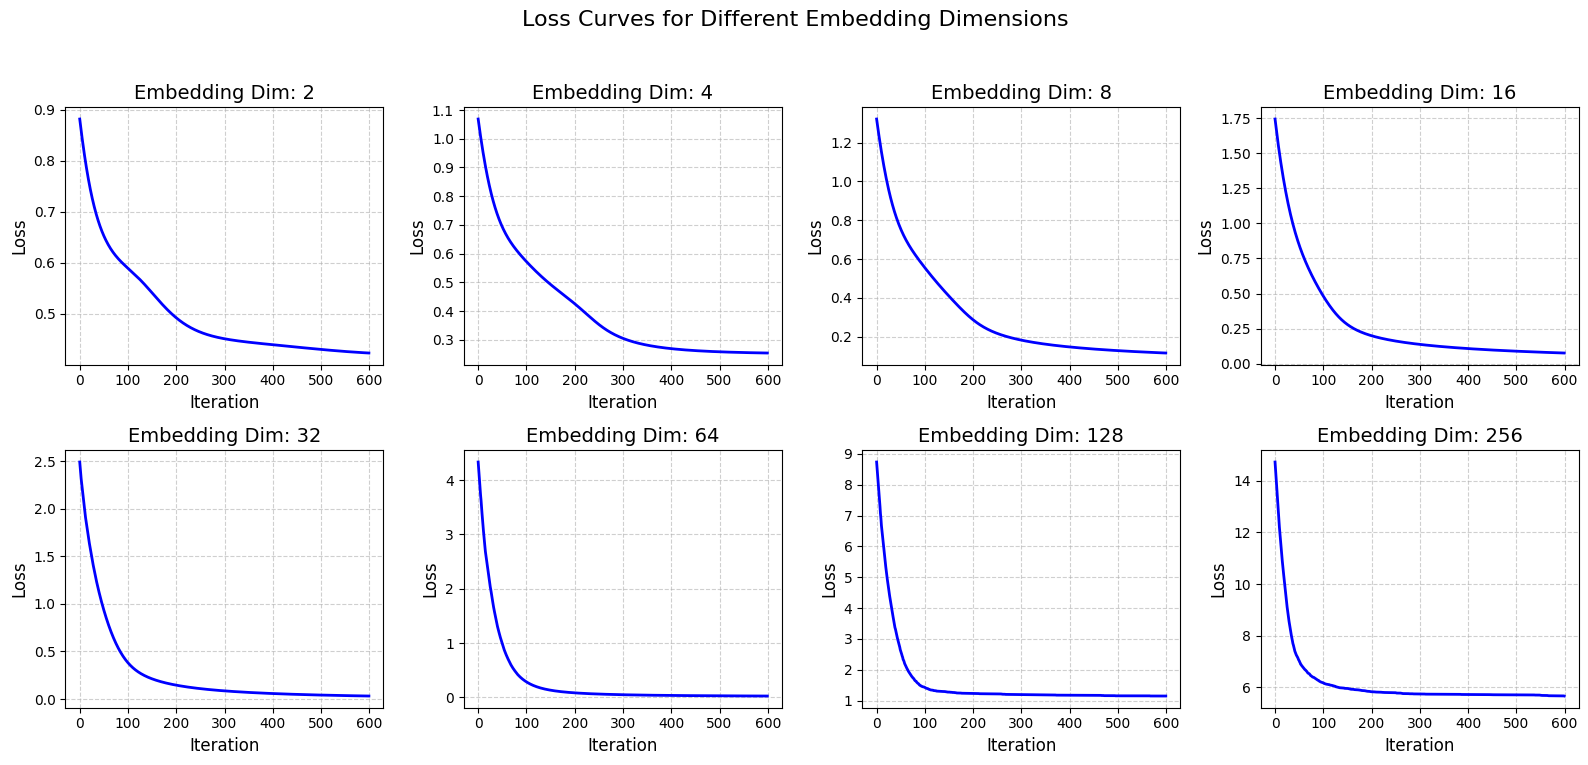

In [4]:
# DO NOT RUN THIS AGAIN, IT'S IN THE CODE BASE ITSELF INSTEAD